In [5]:
# ОТБОР ПРИЗНАКОВ

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import SequentialFeatureSelector
import numpy as np

# Загрузка данных Iris
iris = load_iris()
X = iris.data
y = iris.target
print(iris.feature_names)

# Создание классификатора KNN
knn = KNeighborsClassifier(n_neighbors=4)

# Инициализация Sequential Backward Selection (SBS)
sbs = SequentialFeatureSelector(knn,
    k_features=2,       
    forward=False,      
    floating=False,     
    scoring='accuracy', 
    cv=2,               
    n_jobs=-1
)

# Запуск метода Sequential Backward Selection (SBS) для отбора признаков
sbs = sbs.fit(X, y)

# Индексы отобранных признаков
selected_feature_indices = sbs.k_feature_idx_

# Отобранные признаки
selected_features = np.array(iris.feature_names)[list(selected_feature_indices)]
print("Отобранные признаки:", selected_features)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Отобранные признаки: ['petal length (cm)' 'petal width (cm)']



[2024-07-24 13:07:37] Features: 1/4 -- score: 0.96
[2024-07-24 13:07:37] Features: 2/4 -- score: 0.9533333333333334
[2024-07-24 13:07:37] Features: 3/4 -- score: 0.9733333333333334
[2024-07-24 13:07:37] Features: 4/4 -- score: 0.9666666666666668

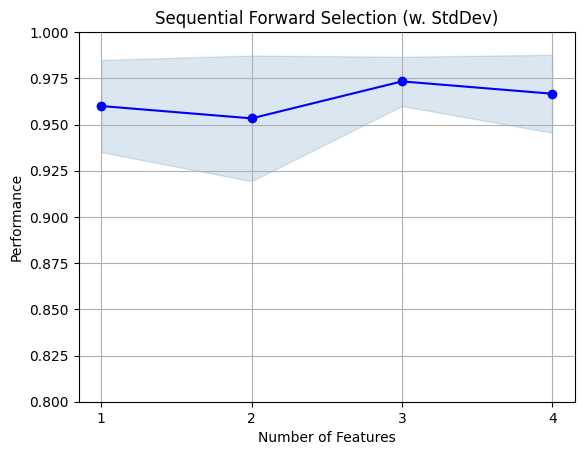

In [3]:
# Визуализация отбора признаков

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

iris_df = load_iris()
X = iris_df.data
y = iris_df.target

knn = KNeighborsClassifier(n_neighbors=3)

sfs = SFS(knn, 
          k_features=4, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          verbose=2,
          cv=5)

sfs = sfs.fit(X, y)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [43]:
# Применяем SBS и SBFS для отбора признаков

# Импорт необходимых библиотек
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector

# Загрузка датасета с данными о недвижимости в Калифорнии
california_housing = fetch_california_housing()
print(california_housing.feature_names)
X = california_housing.data
y = california_housing.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация Sequential Feature Selector для backward selection
sbs = SequentialFeatureSelector(
    LinearRegression(),
    k_features=6,
    forward=False,
    floating=False,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
# Обучение SBS на обучающем наборе
sbs = sbs.fit(X_train, y_train)

# Выбор признаков с помощью SBS
selected_features_sbs = sbs.k_feature_idx_

# Инициализация Sequential Feature Selector с включённым параметром floating для SFFS
sbfs = SequentialFeatureSelector(
    LinearRegression(),
    k_features=6,
    forward=False,
    floating=True,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
# Обучение SBFS на обучающем наборе
sbfs = sbfs.fit(X_train, y_train)

# Выбор признаков с помощью SBFS
selected_features_sbfs = sbfs.k_feature_idx_

# Объединение индексов выбранных признаков из SBS и SBFS для обучения
selected_features = np.union1d(selected_features_sbs, selected_features_sbfs)
print(selected_features)
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Обучение модели линейной регрессии на выбранных признаках
model = LinearRegression()
model.fit(X_train_selected, y_train)
print("Готово!")

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[0 1 2 3 6 7]
Готово!
